In [2]:
import numpy as np
from scipy.integrate import odeint
# import matplotlib.pyplot as plt
from matplotlib import pyplot as PLT
import math
import pandas as pd
import seaborn as sns; sns.set()

In [3]:
#function that returns dy/dt
def model(ic,t,co):
    # Initial conditions
    N = ic[0] #N = naive T-cells
    T = ic[1] #T = Activated T-cells
    I = ic[2] #I = IL-2
    R = ic[3] #R = TRegs
    
    # Constant Values
    alpha = co[0]
    Thy =co[1]
    Thy_max = co[2]   
    epsilon = co[3]
    a = co[4]
    c = co[5]
    b_R = co[6]
    mu = co[7]
    beta = co[8]
    z = co[9]
    g = co[10]
    b_T = co[11]
    d = co[12]
    e_T = co[13]
    e_R = co[14]
    f = co[15]
    

    
    dRdt = alpha*(Thy/Thy_max) + epsilon*a*I*R + c*N - b_R*R
    dNdt = mu*(Thy/Thy_max) - beta*N*(1/(1+R**z)) - c*N - g*N 
    dTdt = beta*N*(1/(1+R**z)) + a*I*T - b_T*T
    dIdt = d*T - e_T*I*T - e_R*I*R - f*I
    
    
    return [dNdt, dTdt, dIdt, dRdt]

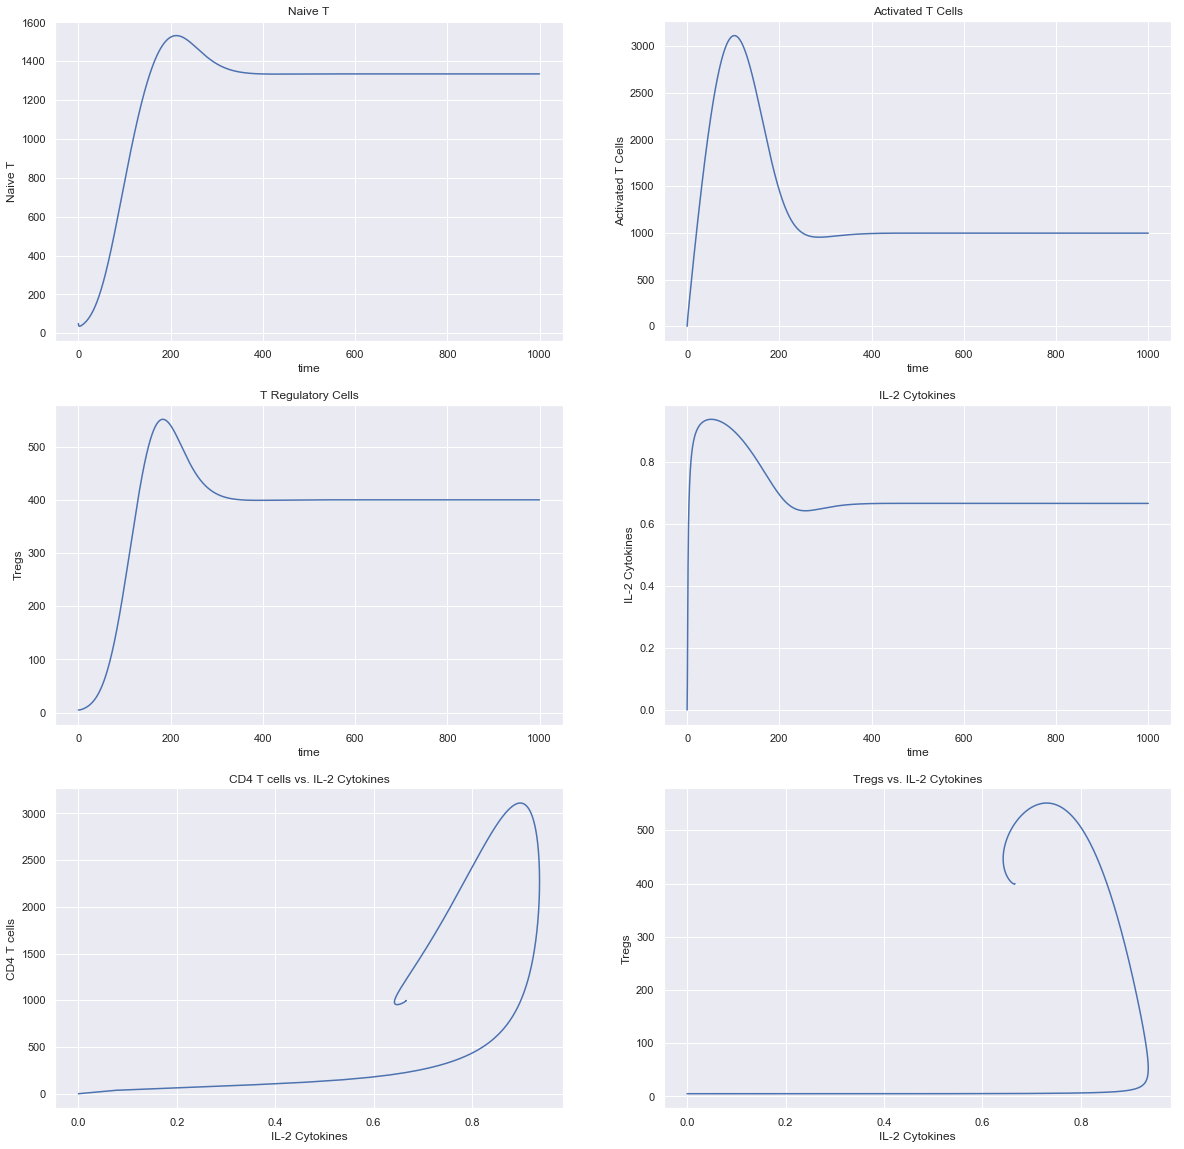

In [9]:
############
#  Thymus  #
############
alpha = 0.006 #------------ T Regulatory Cells
mu = 60   #---------- Naive T cells
Thy = 1 #------------ Size of the thymus
Thy_max = 1 #------- Max size of the thymus

#########################################
#  Naive T cell Differentiation Rates   #
#########################################
c = 0.01 #--------To T regulatory Cells
beta = 10 #------ To activated T cells

###########
#  Tregs  #
###########
epsilon = 1 #------------T regulatory cell Self replication
z = 1 #------- Strength of suppression on Naive T cell differention to activation

##############################################
#  IL-2 Cytokine Expression and Consumption  #
##############################################
d = 0.01 #.7 #------- T Cell Expression
a = 0.1   #------------Activated T cells
e_T = 0.01 #------ T Cell Consumption Rate
e_R = 0.01 #------ T Reg Consumption Rate

##################
#  Death Rates   #
##################
g = 0.01 #-----------Naive T cells
b_T = 0.1 #-----------Activated T cells
b_R = 0.1 #----------Regulatory T Cells
f = 1 #-------------IL-2 Cytokine

#Constants are saved in a array that is fed to the odeint function
co = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, d, e_T, e_R, f]

# time points
#t = np.linspace(0,10)
numTime = 2000;
t = np.linspace(0,1000,num=numTime,endpoint=True)

# initial condition # ic0 = [N,T,I,R]
ic0 = [50,0,0,5]

# solve ODE
dyn = odeint(model,ic0,t, args=(co,))

#Converting all values to a dataframe
Cells = pd.DataFrame(dyn, columns = ['N', 'T', 'I', 'R'])
Cells['time'] = t

fig = PLT.figure(figsize=(20,20))
#Naive
ax1 = fig.add_subplot(321)
ax1.plot(Cells['time'],Cells['N'] , 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Naive T')
ax1.set_title('Naive T')
# T
ax2 = fig.add_subplot(322)
ax2.plot(Cells['time'],Cells['T'],'b-')
ax2.set_xlabel('time')
ax2.set_ylabel('Activated T Cells')
ax2.set_title('Activated T Cells')
# Tregs
ax4 = fig.add_subplot(323)
ax4.plot(Cells['time'],Cells['R'],'b-')
ax4.set_xlabel('time')
ax4.set_ylabel('Tregs')
ax4.set_title('T Regulatory Cells')
# IL-2
ax3 = fig.add_subplot(324)
ax3.plot(Cells['time'],Cells['I'],'b-')
ax3.set_xlabel('time')
ax3.set_ylabel('IL-2 Cytokines')
ax3.set_title('IL-2 Cytokines')
# IL-2 vs T
ax5 = fig.add_subplot(325)
ax5.plot(Cells['I'],Cells['T'],'b-')
ax5.set_xlabel('IL-2 Cytokines')
ax5.set_ylabel('CD4 T cells')
ax5.set_title('CD4 T cells vs. IL-2 Cytokines')
# IL-2 vs. Tregs
ax6 = fig.add_subplot(326)
ax6.plot(Cells['I'],Cells['R'],'b-')
ax6.set_xlabel('IL-2 Cytokines')
ax6.set_ylabel('Tregs')
ax6.set_title('Tregs vs. IL-2 Cytokines')

PLT.show()

In [ ]:
#Starting parameters
# co = [0.006, 1, 1, 1, 0.1, 0.01, 0.1, 4, 10, 0.6, 0.01, 0.1, 0.01, 0.01, 0.01, 1]
